# Exercise: Estimate power plan output demand
    
http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant


Dataset: https://github.com/abulbasar/data/blob/master/Combined_Cycle_Power_Plant.csv

Find rmse and r2 score for training and test dataset.


In [83]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


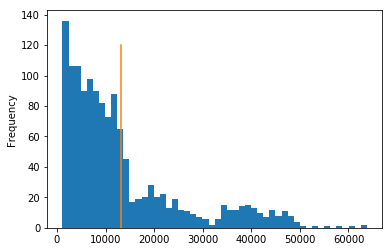

In [87]:
df.charges.plot.hist(bins = 50)
charges_mean = df.charges.mean()
plt.plot([charges_mean, charges_mean], [0, 120])

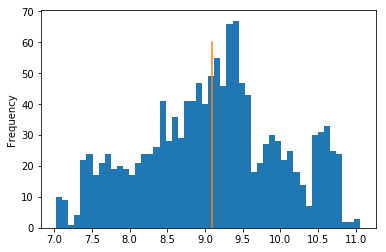

In [88]:
np.log(df.charges).plot.hist(bins = 50)
charges_mean = np.log(df.charges).mean()
plt.plot([charges_mean, charges_mean], [0, 60])

In [90]:
target = "charges"
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)



pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (936, 8) X_test (402, 8)

training mse 0.20407164987815382 
test mse 0.17881132833282085 
training R2 0.7589104330619343 
test R2 0.78742951961976
